In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate Synthetic Data
np.random.seed(42)

data_size = 1000
industries = ['manufacturing', 'healthcare', 'energy', 'logistics']
architectural_patterns = ['connectivity-driven', 'data-intensive', 'compute-centric', 
                          'device-centric', 'hybrid', 'security-focused']
security_levels = ['high', 'medium', 'low']
scalability_levels = ['high', 'medium', 'low']

data = {
    'industry_type': np.random.choice(industries, data_size),
    'data_volume': np.random.uniform(1, 1000, data_size),  # in TB/day
    'latency_requirement': np.random.uniform(1, 100, data_size),  # in milliseconds
    'security_needs': np.random.choice(security_levels, data_size),
    'scalability': np.random.choice(scalability_levels, data_size),
    'processing_power': np.random.uniform(1, 100, data_size),  # in compute units
    'interoperability_needs': np.random.choice(security_levels, data_size),  # simplified
    'recommended_pattern': np.random.choice(architectural_patterns, data_size)
}

df = pd.DataFrame(data)

# Step 2: Preprocess the Data
# Encode categorical variables
label_encoders = {}
for column in ['industry_type', 'security_needs', 'scalability', 'interoperability_needs', 'recommended_pattern']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
df[['data_volume', 'latency_requirement', 'processing_power']] = scaler.fit_transform(
    df[['data_volume', 'latency_requirement', 'processing_power']]
)

# Step 3: Split Data into Training and Testing Sets
X = df.drop('recommended_pattern', axis=1)
y = df['recommended_pattern']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Check Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Accuracy: 0.18
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.15      0.15        33
           1       0.07      0.09      0.08        23
           2       0.23      0.24      0.24        46
           3       0.17      0.14      0.16        28
           4       0.26      0.26      0.26        39
           5       0.13      0.13      0.13        31

    accuracy                           0.18       200
   macro avg       0.17      0.17      0.17       200
weighted avg       0.18      0.18      0.18       200

Feature Importances:
processing_power          0.246542
data_volume               0.240813
latency_requirement       0.236776
industry_type             0.084173
scalability               0.065760
interoperability_needs    0.063465
security_needs            0.062471
dtype: float64


Accuracy: 73.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        37
           1       0.81      0.79      0.80        28
           2       0.69      0.83      0.75        24
           3       0.00      0.00      0.00        10
           4       0.84      0.62      0.71        42
           5       0.75      0.90      0.82        59

    accuracy                           0.73       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.72      0.73      0.72       200



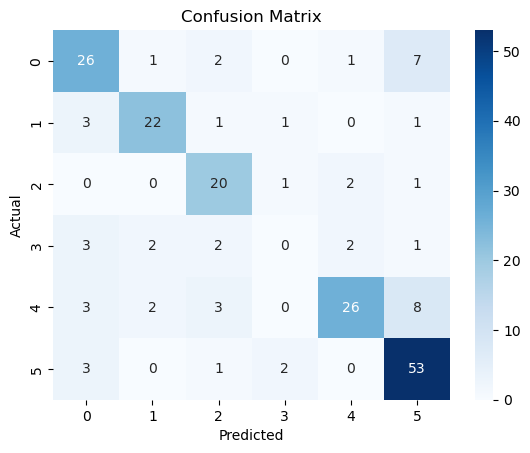

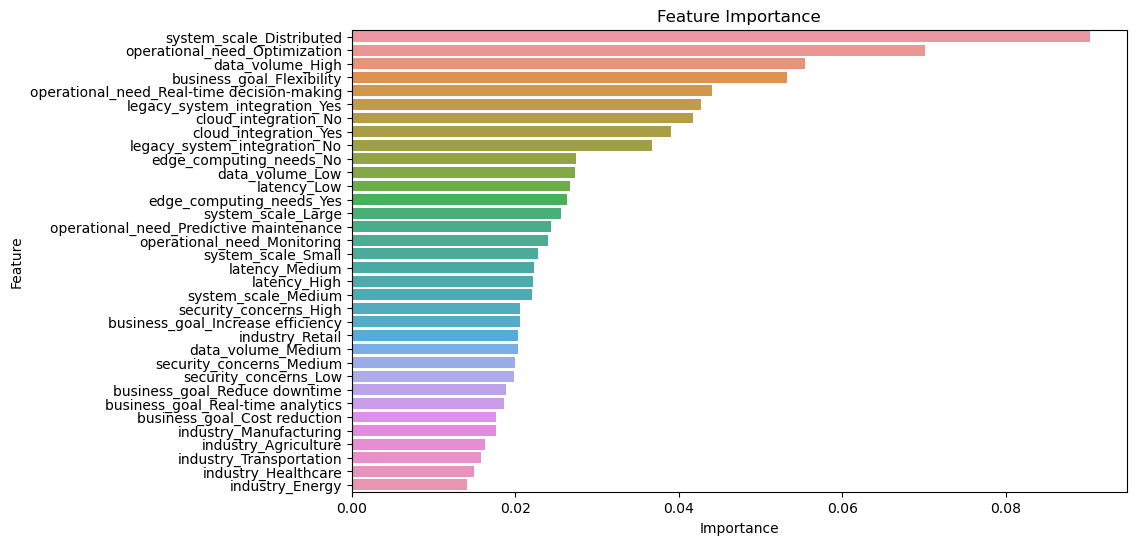

AttributeError: Can only use .cat accessor with a 'category' dtype

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset (assuming a CSV file with system features and target class 'architectural_pattern')
# Example dataset structure:
# | industry | business_goal | system_scale | operational_need | ... | architectural_pattern |
# | -------- | ------------- | ------------ | ---------------- | --- | --------------------- |
# Load your dataset here
df = pd.read_csv('industry4_architecture_dataset.csv')

# Step 3: Preprocess the data
# Assuming 'architectural_pattern' is the target variable and categorical features need to be encoded

# One-hot encode categorical features (for features like industry, business_goal, etc.)
df_encoded = pd.get_dummies(df.drop('architectural_pattern', axis=1))

# Convert the target column (architectural_pattern) to numerical values
df['architectural_pattern'] = df['architectural_pattern'].astype('category').cat.codes

# Split the data into features (X) and target (y)
X = df_encoded
y = df['architectural_pattern']

# Step 4: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Feature Importance
# Plot feature importance to see which features were most influential
feature_importances = model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Feature Importance")
plt.show()

# Step 8: Make predictions (Example)
# Assuming a new industry case with the following characteristics
new_case = {
    'industry': 'Manufacturing',
    'business_goal': 'Reduce downtime',
    'system_scale': 'Large',
    'operational_need': 'Real-time decision-making',
    'data_volume': 'High',
    'latency': 'Low',
    'security_concerns': 'High',
    'legacy_system_integration': 'Yes',
    'cloud_integration': 'Yes'
}

# Encode the new case similarly to the training data
new_case_df = pd.DataFrame([new_case])
new_case_encoded = pd.get_dummies(new_case_df).reindex(columns=X.columns, fill_value=0)

# Predict the architectural pattern for the new case
predicted_architecture = model.predict(new_case_encoded)
predicted_architecture_label = df['architectural_pattern'].cat.categories[predicted_architecture[0]]
print(f"Predicted Architectural Pattern: {predicted_architecture_label}")
